# Tabla de contenido: <a id='back'></a>

* [Descripcion del proyecto](#project_description)
* [Objetivo](#objective)
* [Inicializacion](#start)
    * [Revision del dataset](#data_review)
    * [Descripcion de datos](#data_description)
    * [Validacion de observaciones](#data_validation)
* [Pre Procesamiento de datos](#data_preprocessing)
* [Preparacion de dataset para entrenamiento](#data_training_prep)
    * [Definicion de variable](#target_and_features_definition)
    * [Diagrama de distribucion de variables objetivo](#data_distribution_diagram)
    * [Estandarizacion de caracteristicas categoricas y numericas](#features_standarization)
    * [Segmentacion de datos](#data_split)
* [Desequilibrio de clases](#inbalance_classes)
    * [Entrenamiento de modelos en clases desequilibradas](#training_inbalance_classes)
        * [Decision Tree Classifier](#decision_tree_inbalance)
        * [Random Forest](#random_forest_inbalance)
        * [Logistic Regression](#logistic_regression_inbalance)
        * [Conclusion](#conclusion_1)
* [Equilibrio de clases](#balance_classes)
    * [Submuestreo](#downsample)
        * [Decision Tree Classifier](#decision_tree_dws)
        * [Random Forest](#random_forest_dws)
        * [Logistic Regression](#logistic_regression_dws)
        * [Conclusion](#conclusion_2)
    * [Ajuste de umbral](#threshold_fix)
        * [Decision Tree Classifier](#decision_tree_thr)
        * [Random Forest](#random_forest_thr)
        * [Logistic Regression](#logistic_regression_thr)
        * [Conclusion](#conclusion_3)
* [Entrenamiento del mejor modelo](#best_model_train)
* [Conclusiones](#end)

# Descripcion del proyecto <a id='project_description'></a>
Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

## Objetivo <a id='objective'></a>
Predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor *F1* posible. Para aprobar la revisión, necesitas un valor *F1* de al menos 0.59. Verifica F1 para el conjunto de prueba.

Además, debes medir la métrica *AUC-ROC* y compararla con el valor *F1*.

## Inicializacion <a id='start'></a>
Para comenzar el proyecto, importamos las librerias correspondientes y revisamos el dataset entregado en la ruta: `dataset/Churn.csv`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split #Segmentacion de dataset

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier # Arboles de decisiones
from sklearn.ensemble import RandomForestClassifier # Bosques aleatorios
from sklearn.linear_model import LogisticRegression # Regresion logistica

from sklearn.metrics import  confusion_matrix

from sklearn.metrics import (
    roc_auc_score,
    f1_score,
)

In [2]:
# Cargar el dataset

#df = pd.read_csv('.\datasets\Churn.csv')
df = pd.read_csv('/datasets/Churn.csv') #ruta Tripleten

### Revision del dataset <a id='data_review'></a>
A continuacion, revisaremos si el dataset se encuentra limpio y listo para trabajar.

In [3]:
# Verificar la informacion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Descripcion de datos <a id='data_description'></a>
**Características**

- *RowNumber*: índice de cadena de datos
- *CustomerId:* identificador de cliente único
- *Surname:* apellido
- *CreditScore:* valor de crédito
- *Geography:* país de residencia
- *Gender:* sexo
- *Age:* edad
- *Tenure:* período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- *Balance:* saldo de la cuenta
- *NumOfProducts:* número de productos bancarios utilizados por el cliente
- *HasCrCard:* el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- *IsActiveMember:* actividad del cliente (1 - sí; 0 - no)
- *EstimatedSalary:* salario estimado

**Objetivo**

- *Exited:* El cliente se ha ido (1 - sí; 0 - no)

### Validacion de observaciones <a id='data_validation'></a>

In [4]:
# Mostrar las primeras filas del dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
# Validar valores nulos
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
# Validar filas duplicados
df.duplicated().sum()

0

Se observa que el dataset contiene valores nulos en la columna `Tenure`. Por otro lado, no presenta valores duplicados ni errores en tipos de datos.

## Pre Procesamiento de datos <a id='data_preprocessing'></a>

Para evaluar si es conveniente imputar los valores nulos de la columna `Tenure` o eliminarlos, validamos si la media de los datos objetivos (`Exited`) presentan diferencias significativas en ambos casos.

**Proporcion de valores = 1 en `Exited` con valores nulos**

In [7]:
# Con valores nulos
df['Exited'].mean()

0.2037

**Proporcion de valores = 1 en `Exited` eliminando los valores nulos**

In [8]:
# Eliminando los valores nulos
df.dropna()['Exited'].mean()
#df['Exited'].mean()

0.2039379606203938

Se observa que no existe diferencia significativa entre ambas medidas. Por lo tanto, procedemos a eliminar los valores nulos y tendremos un nuevo tamaño en el dataset.

In [9]:
# Eliminamos los valores nulos y validamos
df = df.dropna()
df.shape

(9091, 14)

In [10]:
# Mostrar que no hay valores nulos
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Preparacion de dataset para entrenamiento <a id='data_training_prep'></a>

### Definicion de variables <a id='target_and_features_definition'></a>

Para definir las variables caracteristicas y objetivo, mantendremos solo aquellas columnas que generaran utilidad o valor cuando se realice el entrenamiento de modelos.

Por lo tanto, mantendremos las siguientes variables de esta manera:

- Objetivo: Exited
- Features: CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary

In [11]:
# Creamos las variables
features = df.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
target = df['Exited']

In [12]:
print(features.shape)
print(target.shape)

(9091, 10)
(9091,)


### Diagrama de distribucion de variable objetivo <a id='data_distribution_diagram'></a>
A continuacion, creamos unos histogramas para ver la distribucion de la variable objetivo respecto a las demas caracteristicas.

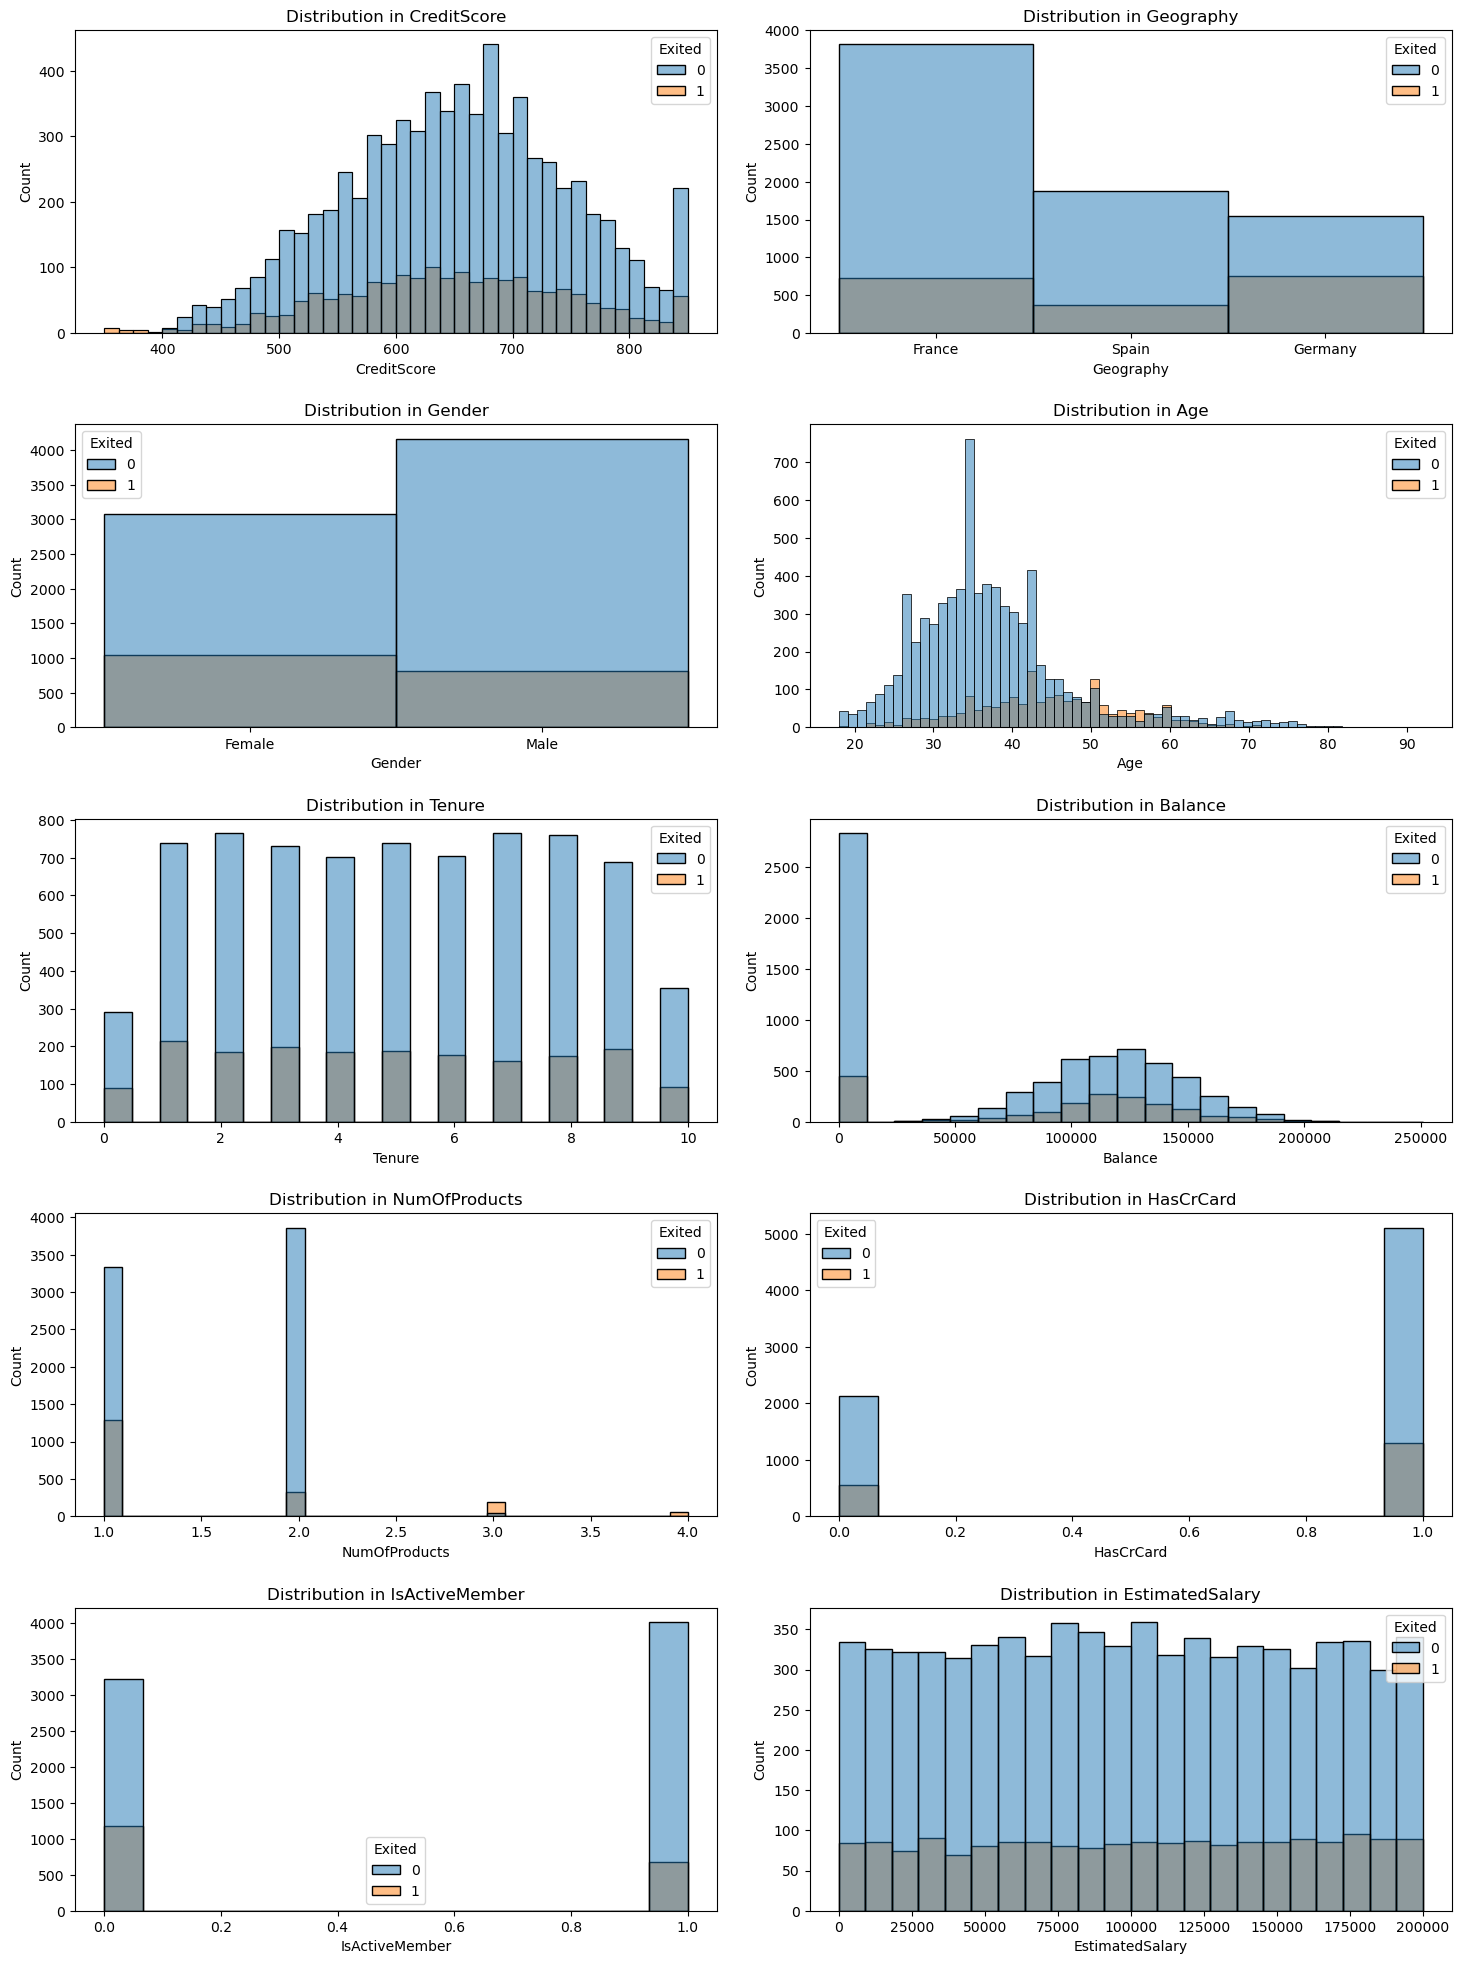

In [13]:
# Histogramas de distribucion de features respecto a Target
features_list = features.columns
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(15, 20))
for i, feature in enumerate(features_list): 
    ax.flatten()[i].set_title(f"Distribution in {feature}")
    sns.histplot(x=df[features_list[i]], hue=df['Exited'],ax=ax.flatten()[i])

fig.tight_layout(pad=2.0)

En los graficos se observa que los clientes que permanecen en el banco son aquellos que tienen un menor credito, mayores de 50 y los que tienen mas de 2 productos en el banco. En general, son mas los clientes que abandonan la entindad bancaria.

### Estandarizacion de caracteristicas categoricas y numericas <a id='features_standarization'></a>
Separamos las caracteristicas en numericas y categoricas. En este caso, las caracteristicas categoricas son Geography y Gender. Luego de ello, convertiremos todos los valores del tataset en valores numericos.

Primero: Las caracteristicas numericas seran estandarizadas segun su desviacion estandar.
Segundo: Las columnas categoricas seran transformadas en valores booleanos con el metodo Oone-Hot.

In [14]:
# Guardar la lista de columnas numericas
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [15]:
# Estandarizacion escalar de columnas numericas
scaler = StandardScaler()
scaler.fit(features[num_features])
features[num_features] = scaler.transform(features[num_features])
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.329200,France,Female,0.289040,-1.035627,-1.227780,-0.912601,0.646896,0.96934,0.020264
1,-0.443301,Spain,Female,0.194298,-1.381103,0.116887,-0.912601,-1.545844,0.96934,0.214527
2,-1.542828,France,Female,0.289040,1.037224,1.333920,2.529911,0.646896,-1.03163,0.238632
3,0.500631,France,Female,0.004815,-1.381103,-1.227780,0.808655,-1.545844,-1.03163,-0.110281
4,2.066937,Spain,Female,0.383782,-1.035627,0.785996,-0.912601,0.646896,0.96934,-0.366132
...,...,...,...,...,...,...,...,...,...,...
9994,1.548293,France,Female,-0.942603,-1.035627,-1.227780,0.808655,-1.545844,-1.03163,1.173038
9995,1.247479,France,Male,0.004815,0.000798,-1.227780,0.808655,0.646896,-1.03163,-0.067866
9996,-1.397607,France,Male,-0.374153,1.728174,-0.307305,-0.912601,0.646896,0.96934,0.026354
9997,0.604360,France,Female,-0.279411,0.691748,-1.227780,-0.912601,-1.545844,0.96934,-1.008227


In [16]:
# Transformacion de columnas categoricas a numericas con codificacion One-Hot
features = pd.get_dummies(features, drop_first=True)
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.329200,0.289040,-1.035627,-1.227780,-0.912601,0.646896,0.96934,0.020264,0,0,0
1,-0.443301,0.194298,-1.381103,0.116887,-0.912601,-1.545844,0.96934,0.214527,0,1,0
2,-1.542828,0.289040,1.037224,1.333920,2.529911,0.646896,-1.03163,0.238632,0,0,0
3,0.500631,0.004815,-1.381103,-1.227780,0.808655,-1.545844,-1.03163,-0.110281,0,0,0
4,2.066937,0.383782,-1.035627,0.785996,-0.912601,0.646896,0.96934,-0.366132,0,1,0


### Segmentacion de datos <a id='data_split'></a>
En esta seccion, segmentaremos el conjunto de datos en 3 partes: conjunto de entrenamiento, conjunto de validacion y conjunto de prueba. Esto se realiza para mejorar la calidad del entrenamiento y evitar posibles sobreajustes.

Estos conjuntos estaran divididos con la siguiente distribucion respectivamente: 0.6, 0.2, 0.2. De esta manera, tenemos un conjunto mayor para el entrenamiento del modelo y guardamos 2 porciones para la validacion y pruebas.

In [17]:
# Dividimos los datos en conjuntos de entrenamiento y el 40% en un conjunto temporal
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)

# Divide los datos temporales en conjuntos de validación y prueba en proporcion del 20% para cada conjunto.
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

In [18]:
# Mostramos el tamaño de cada variable
print(f"""
      Features Train: {features_train.shape}
      Target Train: {target_train.shape}
      Features Valid: {features_valid.shape}
      Target Valid: {target_valid.shape}
      Features Test: {features_test.shape}
      Target Test: {target_test.shape}
""")


      Features Train: (5454, 11)
      Target Train: (5454,)
      Features Valid: (1818, 11)
      Target Valid: (1818,)
      Features Test: (1819, 11)
      Target Test: (1819,)



## Desequilibrio de clases <a id='inbalance_classes'></a>
A continuacion, mostramos la proporcion de clases en nuestra variable objetivo `Exited`. Se observa que existe desequilibrio entre ellas siendo el 20% de los valores = 1 y el 80% = 0.

In [19]:
# Validamos el equilibrio de clases
target_train.mean()

0.20645397873120647

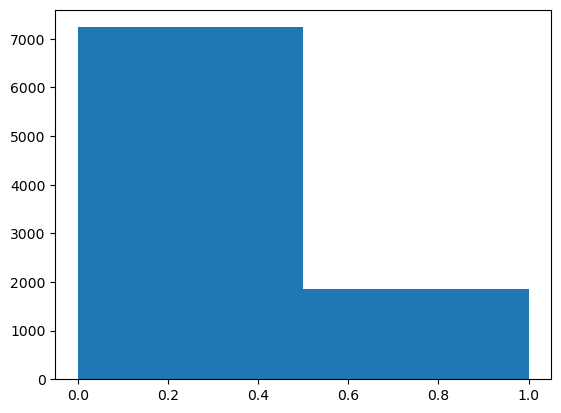

In [20]:
# Histograma que muestra el balance de clases de target
plt.hist(target, bins=2)
plt.show()

### Entrenamiento de modelos en clases desequilibradas <a id='training_inbalance_classes'></a>
A continuacion, entrenamos los modelos sin tener en cuenta el equilibrio de clases.

In [22]:
# Funcion para graficar la matriz de confusion
def draw_confusion_matrix(f1,roc_auc, matriz,titulo):
    plt.figure(figsize=(4, 4))
    matriz = pd.DataFrame(matriz, 
                          columns=["0 : Abandona", "1 : Permanece"])
    
    plt.matshow(matriz, cmap="tab20", vmin=0, vmax=20, fignum=1)
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"),
                 ("Falsos\nnegativos", "Verdaderos\npositivos"))
    plt.text(1.60, -0.30, titulo, fontsize=18, c="blue")
    plt.text(2.1, 0.10, "F1 score: %0.2f" % f1, fontsize=18)
    plt.text(2.1, 0.30, "ROC AUC: %0.2f" % roc_auc, fontsize=18)
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")           
    plt.show()


#### Decision Tree Classifier <a id='decision_tree_inbalance'></a>
Creamos un modelo con los hiperaparametros por default, lo entrenamos y predecimos las probabilidades de clase 1. Mostramos las metricas: F1 y ROC AUC asi como la matriz de confusion.

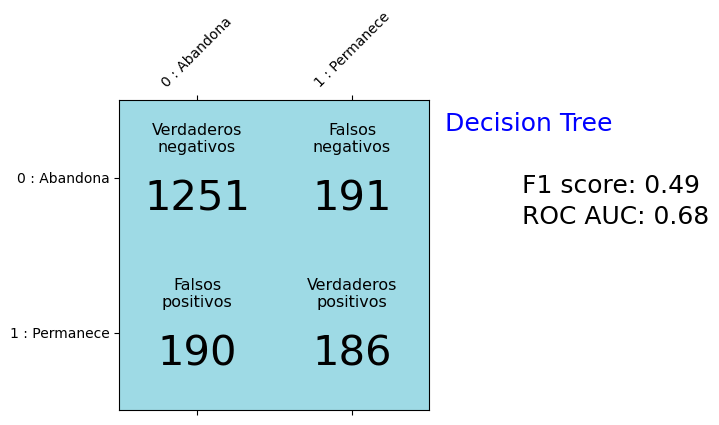

In [23]:
prev_model_tree = DecisionTreeClassifier(random_state=12345) 
prev_model_tree.fit(features_train,target_train) 
predictions_dt = prev_model_tree.predict_proba(features_valid)[:,1]>0.5

matriz = confusion_matrix(target_valid, predictions_dt)
f1 = f1_score(target_valid, predictions_dt)
roc_auc = roc_auc_score(target_valid, predictions_dt)


draw_confusion_matrix(f1, roc_auc,matriz, "Decision Tree")

#### Random Forest <a id='random_forest_inbalance'></a>
Creamos un modelo con los hiperaparametros por default, lo entrenamos y predecimos las probabilidades de clase 1. Mostramos las metricas: F1 y ROC AUC.

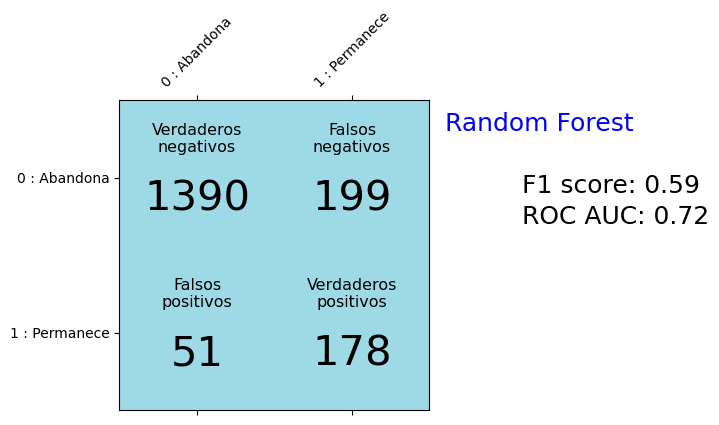

In [24]:
prev_model_randomforest = RandomForestClassifier(random_state=12345)
prev_model_randomforest.fit(features_train, target_train)
prev_predictions_rf = prev_model_randomforest.predict_proba(features_valid)[:,1]>0.5

prev_matriz_rf = confusion_matrix(target_valid, prev_predictions_rf)
prev_f1_rf = f1_score(target_valid, prev_predictions_rf)
prev_roc_auc_rf = roc_auc_score(target_valid, prev_predictions_rf)


draw_confusion_matrix(prev_f1_rf, prev_roc_auc_rf, prev_matriz_rf, "Random Forest")


#### Logistic Regression <a id='logistic_regression_inbalance'></a>
Creamos un modelo con los hiperaparametros por default, lo entrenamos y predecimos las probabilidades de clase 1. Mostramos las metricas: F1 y ROC AUC.

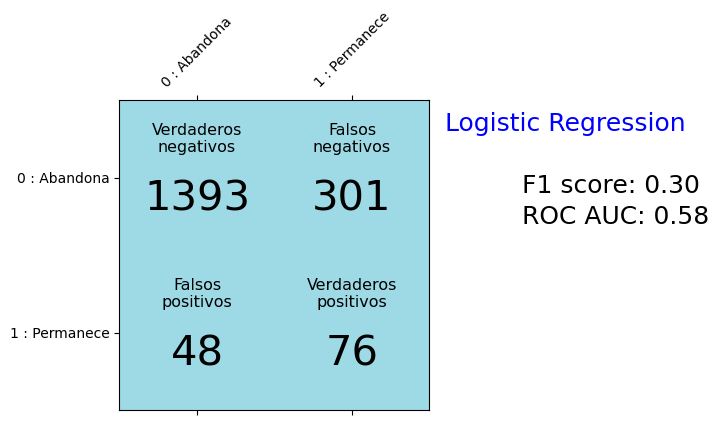

In [25]:
prev_model_logregression = LogisticRegression()
prev_model_logregression.fit(features_train, target_train)
prev_predictions_lr = prev_model_logregression.predict_proba(features_valid)[:,1]>0.5

prev_matriz_lr = confusion_matrix(target_valid, prev_predictions_lr)
prev_f1_lr = f1_score(target_valid, prev_predictions_lr)
prev_roc_auc_lr = roc_auc_score(target_valid, prev_predictions_lr)


draw_confusion_matrix(prev_f1_lr, prev_roc_auc_lr, prev_matriz_lr, "Logistic Regression")

#### Conclusion <a id='conclusion_1'></a>
Luego de visualizar las metricas de los 3 modelos entrenados y, a pesar que los 3 modelos no presentan valores de F1 y ROC_AUC muy bajos, se observa que la prediccion tiene muchos errores. 

**El modelo se equivoca mas en predecir a los clientes que permanecen de los que abandonan el banco.** Esto es debido a que, la clase = 0 es superior en tamaño a la clase = 1, por ello, el modelo se entrena creyendo que la mayoria abandonaria el banco.

## Equilibrio de clases <a id='balance_classes'></a>

Para equilibrar las clases, aplicaremos las tecnicas Submuestreo y Ajuste de umbral para los 3 modelos y escogeremos el modelo que nos de como resultado el mejor valor F1.

### Sub muestreo <a id='downsample'></a>
Para el submuestreo reduciremos el tamaño de los conjuntos de entrenamiento donde tengamos una proporcion de `unos` y `ceros` mas equilibradas.
Para ello, definimos una funcion `downsample` donde recibira como parametros al conjunto de entrenamiento y de objetivo asi como el tamaño al cual sera fraccionado la clase `cero` que es el 25%. De esta manera, obtenemos unas clases mas equilibradas.

In [26]:
# Funcion para el sub muestreo
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]) 
    target_downsampled = pd.concat([target_zeros.sample(frac = fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


In [27]:
# Aplicamos el submuestreo 
features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.25
)

print(features_downsampled.shape)
print(target_downsampled.shape)
# Validamos la nueva proporcion de la variable objetivo:
print(target_downsampled.mean())

(2208, 11)
(2208,)
0.509963768115942


#### Decision Tree Classifier  <a id='decision_tree_dws'></a>
Con los nuevos conjuntos de datos de entrenamiento reducidos y equilibrado, entrenamos el modelo de clasificacion de arboles de decision donde obtendremos el mejor valor F1 encontrado y graficaremos su matriz de confusion correspondiente.

En este caso, se observa que el mejor modelo encontrado es con los siguientes valores **class_weight='balanced', max_depth=4** y dio como resultado el **F1: 0.57 y ROC_AUC: 0.75**.

best model:DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=12345)


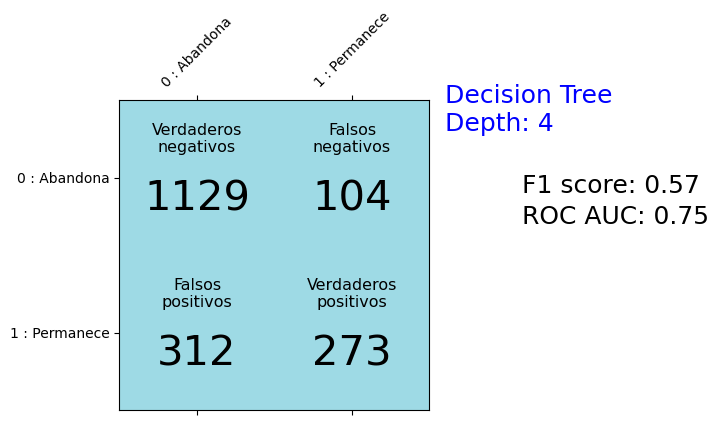

In [28]:
depth = [2,4,8,10]
best_model_dt = None
best_f1_dt = 0

for dp  in depth: 
    new_model_tree = DecisionTreeClassifier(random_state=12345, class_weight='balanced',max_depth=dp) 
    new_model_tree.fit(features_downsampled,target_downsampled) 
    new_predictions_dt = new_model_tree.predict_proba(features_valid)[:,1]>0.5

    new_matriz_dt = confusion_matrix(target_valid, new_predictions_dt)
    new_f1_dt = f1_score(target_valid, new_predictions_dt)
    new_roc_auc_dt = roc_auc_score(target_valid, new_predictions_dt)
    #print(dp, new_f1_dt,new_roc_auc_dt )
    if new_f1_dt > best_f1_dt:
        best_model_dt = new_model_tree
        best_f1_dt = new_f1_dt
        best_depth = dp
        best_roc_auc = new_roc_auc_dt
        best_matrix = new_matriz_dt

print(f"best model:{best_model_dt}")
draw_confusion_matrix(best_f1_dt, best_roc_auc,best_matrix, f"Decision Tree\nDepth: {best_depth}")

#### Random Forest  <a id='random_forest_dws'></a>
Con los nuevos conjuntos de datos de entrenamiento reducidos y equilibrado, entrenamos el modelo de clasificacion de bosques aleatorios donde obtendremos el mejor valor F1 encontrado y graficaremos su matriz de confusion correspondiente.

En este caso, se observa que el mejor modelo encontrado es con los siguientes valores **class_weight='balanced', n_estimators=100** y dio como resultado el **F1: 0.59 y ROC_AUC: 0.79**.

best model:RandomForestClassifier(class_weight='balanced', random_state=12345)


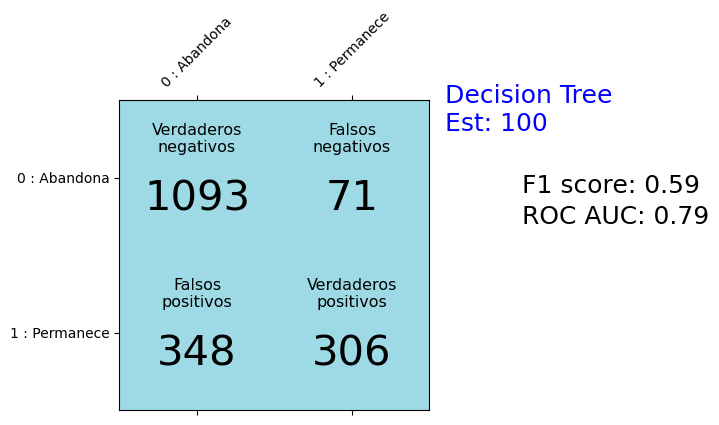

In [29]:
# Entrenamos el modelo iterando entre una lista de cantidad de arboles
estimators = [5,10,11,12,15,20,40,100]
best_model_rf = None
best_f1_rf = 0

for est  in estimators: 
    new_model_randomforest = RandomForestClassifier(class_weight='balanced', n_estimators=est,random_state = 12345)
    new_model_randomforest.fit(features_downsampled,target_downsampled) 
    new_predictions_rf = new_model_randomforest.predict_proba(features_valid)[:,1]>0.5

    new_matriz_rf = confusion_matrix(target_valid, new_predictions_rf)
    new_f1_rf = f1_score(target_valid, new_predictions_rf)
    new_roc_auc_rf = roc_auc_score(target_valid, new_predictions_rf)
    #print(est, new_f1_rf,new_roc_auc_rf )
    if new_f1_rf > best_f1_rf:
        best_model_rf = new_model_randomforest
        best_f1_rf = new_f1_rf
        best_est = est
        best_roc_auc = new_roc_auc_rf
        best_matrix = new_matriz_rf

print(f"best model:{best_model_rf}")
draw_confusion_matrix(best_f1_rf, best_roc_auc,best_matrix, f"Random Forest\nEst: {best_est}")


#### Logistic Regression <a id='logistic_regression_dws'></a>
Con los nuevos conjuntos de datos de entrenamiento reducidos y equilibrado, entrenamos el modelo de clasificacion de regresion logistica donde obtendremos el mejor valor F1 encontrado y graficaremos su matriz de confusion correspondiente.

En este caso, se observa que el mejor modelo encontrado dio como resultado el **F1: 0.51 y ROC_AUC: 0.71**.

best model:LogisticRegression(class_weight='balanced')


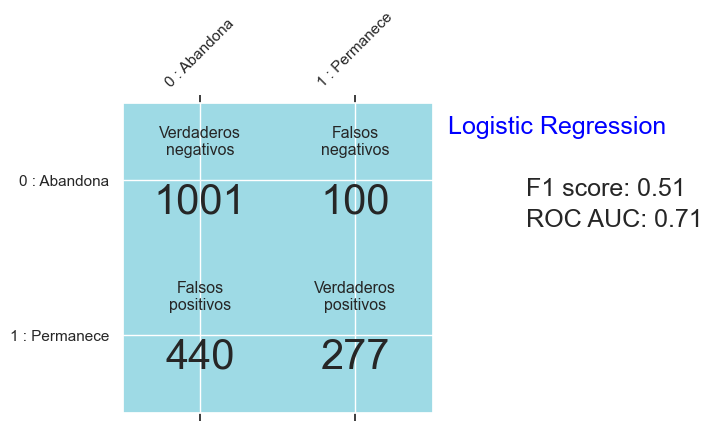

In [37]:
new_model_logregression = LogisticRegression(class_weight='balanced')
new_model_logregression.fit(features_downsampled,target_downsampled) 
new_predictions_lr = new_model_logregression.predict_proba(features_valid)[:,1]>0.5

new_matriz_lr = confusion_matrix(target_valid, new_predictions_lr)
new_f1_lr = f1_score(target_valid, new_predictions_lr)
new_roc_auc_lr = roc_auc_score(target_valid, new_predictions_lr)

print(f"best model:{new_model_logregression}")
draw_confusion_matrix(new_f1_lr, new_roc_auc_lr, new_matriz_lr, "Logistic Regression")

#### Conclusion <a id='conclusion_2'></a>
Luego de entrenar los 3 modelos en un conjunto de entrenamiento reducido por la tecninca del submuestreo, el mejor F1 encontrado fue con el modelo de **Random Forest** con los siguientes hiperparametros: 
- class_weight='balanced', 
- n_estimators=100

Y dio como resultado: 
- F1: 0.59
- ROC_AUC: 0.79

### Ajuste de Umbral <a id='threshold_fix'></a>
Para el ajuste de umbral iteraremos por 201 valores en el rango del 0 al 1 y entrenaremos los 3 tipos de modelos para encontrar el mejor valor F1.

#### Decision Tree Classifier <a id='decision_tree_thr'></a>
Entrenamos el modelo de clasificacion de arboles de decision iterando con distintos valores de umbral donde obtendremos el mejor valor F1 encontrado y lo graficaremos.

En este caso, se observa que el mejor modelo encontrado es con los siguientes valores **max_depth=8, threshold=0.575 y 0.580** y dio como resultado el **F1: 0.580247**.

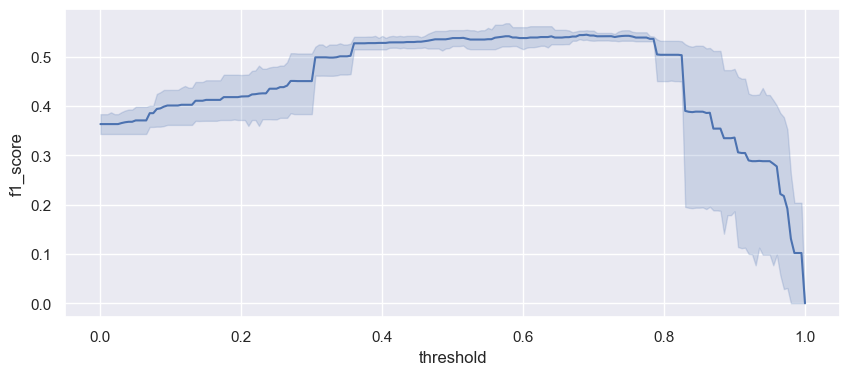

CPU times: total: 10.8 s
Wall time: 10.9 s


In [31]:
%%time
thresholds = np.linspace(0, 1, 201)
depth = [2,4,8,10]
f1_scores = []
depth_cl =[]
thresholds_cl_dt = []

for dp in depth:

  umb_model_dt = DecisionTreeClassifier(random_state=12345, class_weight="balanced", max_depth=dp)
  umb_model_dt.fit(features_train, target_train)

  for t in thresholds:

    valid_preds = umb_model_dt.predict_proba(features_valid)[:,1]
    f1_scores.append(f1_score(target_valid, (valid_preds > t)))
    depth_cl.append(dp)
    thresholds_cl_dt.append(t)

f1_scores_df_dt = pd.DataFrame(data={
    "depth": depth_cl,
    "threshold": thresholds_cl_dt,
    "f1_score": f1_scores
})

#Graficamos los valores de F1 para cada threshold
sns.set_theme()

plt.figure(figsize=(10, 4))
sns.lineplot(data=f1_scores_df_dt, x="threshold", y="f1_score", ax=plt.gca())
plt.show()

In [32]:
# Mostramos el mejor modelo decision tree con el mejor umbral
f1_scores_df_dt.loc[f1_scores_df_dt["f1_score"] == f1_scores_df_dt["f1_score"].max(), ]

,depth,threshold,f1_score
517,8,0.575,0.580247
518,8,0.580,0.580247


#### Random Forest  <a id='random_forest_thr'></a>
Entrenamos el modelo de clasificacion de bosques aleatorios iterando con distintos valores de umbral donde obtendremos el mejor valor F1 encontrado y lo graficaremos.

En este caso, se observa que el mejor modelo encontrado es con los siguientes valores **n_estimators=100, threshold=0.340 y 0.345** y dio como resultado el **F1: 0.635262**.

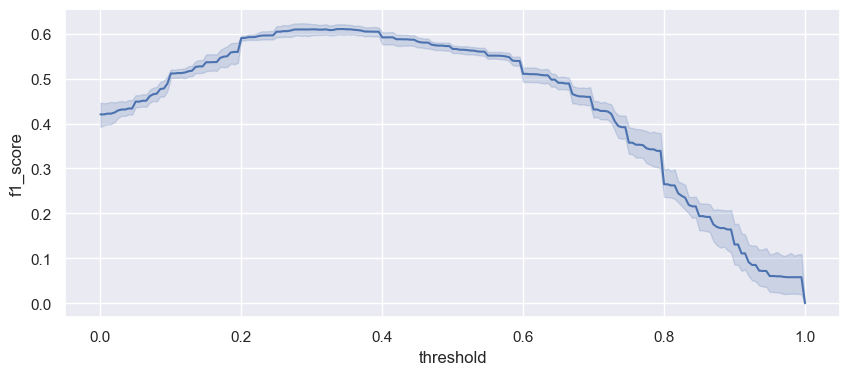

CPU times: total: 33.3 s
Wall time: 33.8 s


In [33]:
%%time
thresholds = np.linspace(0, 1, 201)
estimators = [5,10,11,12,15,20,40,100]
f1_scores = []
estimators_cl =[]
thresholds_cl = []

for est in estimators:

  umb_model_rdf = RandomForestClassifier(random_state=12345, class_weight="balanced", n_estimators=est)
  umb_model_rdf.fit(features_train, target_train)

  for t in thresholds:

    valid_preds = umb_model_rdf.predict_proba(features_valid)[:,1]
    f1_scores.append(f1_score(target_valid, (valid_preds > t)))
    estimators_cl.append(est)
    thresholds_cl.append(t)

f1_scores_df_rf = pd.DataFrame(data={
    "n_estimators": estimators_cl,
    "threshold": thresholds_cl,
    "f1_score": f1_scores
})

#Graficamos los valores de F1 para cada threshold
sns.set_theme()

plt.figure(figsize=(10, 4))
sns.lineplot(data=f1_scores_df_rf, x="threshold", y="f1_score", ax=plt.gca())
plt.show()

In [34]:
# Mostramos el mejor modelo random forest con el ajuste de umbral
f1_scores_df_rf.loc[f1_scores_df_rf["f1_score"] == f1_scores_df_rf["f1_score"].max(), ]

,n_estimators,threshold,f1_score
1475,100,0.340,0.635262
1476,100,0.345,0.635262


#### Logisctic Regression <a id='logistic_regression_thr'></a>
Entrenamos el modelo de clasificacion de regresion logistica iterando con distintos valores de umbral donde obtendremos el mejor valor F1 encontrado y lo graficaremos.

En este caso, se observa que el mejor modelo encontrado fue con **threshold = 0.545** y dio como resultado el **F1: 0.519068**.

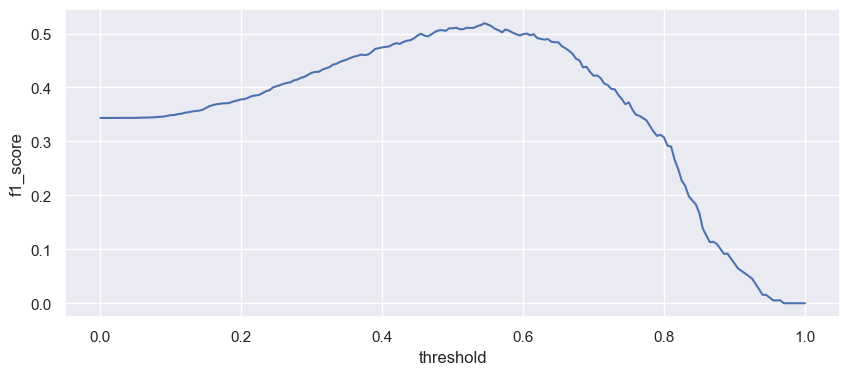

CPU times: total: 1.19 s
Wall time: 1.18 s


In [35]:
%%time

thresholds = np.linspace(0, 1, 201)
f1_scores_cl = []

umb_model_lr = LogisticRegression(random_state=12345, class_weight="balanced")
umb_model_lr.fit(features_train, target_train)

for t in thresholds:

  valid_preds = umb_model_lr.predict_proba(features_valid)[:,1]
  f1_scores_cl.append(f1_score(target_valid, (valid_preds > t)))

f1_scores_df_lr = pd.DataFrame(data={
    "threshold": thresholds,
    "f1_score": f1_scores_cl
})

#Graficamos los valores de F1 para cada threshold
sns.set_theme()

plt.figure(figsize=(10, 4))
sns.lineplot(data=f1_scores_df_lr, x="threshold", y="f1_score", ax=plt.gca())
plt.show()

In [36]:
# Mostramos el mejor modelo logistic regression con el ajuste de umbral
f1_scores_df_lr.loc[f1_scores_df_lr["f1_score"] == f1_scores_df_lr["f1_score"].max(), ]

,threshold,f1_score
109,0.545,0.519068


#### Conclusion <a id='conclusion_3'></a>
Luego de entrenar los 3 modelos en un conjunto de entrenamiento reducido por la tecnica del submuestreo, el mejor F1 encontrado fue con el modelo de **Random Forest** con los siguientes hiperparametros: 
- threshold=0.340 y 0.345 
- n_estimators=100

Y dio como resultado: 
- F1: 0.635262

## Entrenamiento del mejor modelo <a id='best_model_train'></a>
Comparando los resultados obtenidos aplicando las tecnincas de submuestreo y ajuste de umbral, el mejor modelo encontrado fue con la tecnica de ajuste de umbral, por lo tanto, aplicaremos el modelo random forest con ajuste de umbral para nuestro conjunto de pruebas reservado.

### Prueba del modelo
En el conjunto de pruebas aplicaremos el modelo random forest entrenado con un umbral de 0.345 y n_estimators = 100.

best model:RandomForestClassifier(class_weight='balanced', random_state=12345)


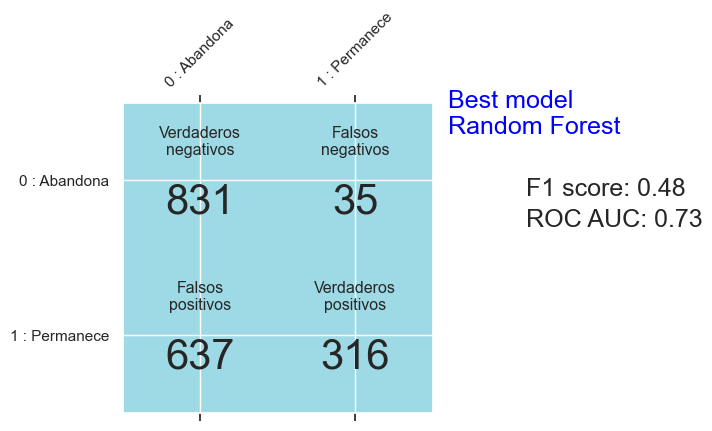

In [41]:
thresholds = 0.345
estimator = 100

final_model = RandomForestClassifier(class_weight='balanced', n_estimators=estimator,random_state = 12345)
final_model.fit(features_train, target_train) 
final_valid_preds = new_model_randomforest.predict_proba(features_test)[:,1]>thresholds

final_matrix = confusion_matrix(target_test, final_valid_preds)
final_f1_score = f1_score(target_test, final_valid_preds)
final_roc_auc = roc_auc_score(target_test, final_valid_preds)

print(f"best model:{final_model}")
draw_confusion_matrix(final_f1_score, final_roc_auc,final_matrix, f"Best model\nRandom Forest")

## Conclusiones <a id='end'></a>
1. En la etapa de inicializacion del proyecto, se revisaron los datos entregados donde se observo que habian valores nulos en la columna `tenure`; sin embargo, se valido que esto no impactaba en la proporcion de la columna objetivo por lo que se opto en depurar estos valores y asi tener un dataset limpio.
2. En la preparacion del dataset, se generaron las variables caracteristicas y objetivo, se transformaron todos los datos en numericos aplicando las tecnicas One-Hot y estandarizacion escalar y finalmente, se segmento el dataset en 3 conjuntos: entrenamiento, validacion y prueba.
3. Se valido que existia desequilibrio en las clases de entrenamiento en una proporcion de 80% = 0 y 20% = 1. Con este desequilibrio de datos entrenamos 3 modelos teniendo como resultado probabilidades de F1 no tan bajas pero con muchos errores de prediccion.
4. Para balancear las clases aplicamos 2 tecnicas: submuestreo y ajuste de umbral. Para cada una de las tecnicas entrenamos los 3 modelos donde el mejor modelo fue el de random forest aplicando el ajuste de umbral a 0.345 y n_estimators=100. Obteniendo un valor F1= 0.635262.
5. Finalmente, aplicamos el mejor modelo obtenido con el conjunto de pruebas logrando predicciones un poco mas correctas y el siguiente resultado: 
    - F1: 0.48
    - ROC_AUC: 0.73